<a href="https://colab.research.google.com/github/Krish-mal15/Brain-Tumor-Segmentation-IGRT-Algorithms/blob/main/Brain_Tumor_UNET_Segmentation_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pixels:  [[ 60 150   0]
 [ 60 150   1]
 [ 60 150   2]
 ...
 [118 169   0]
 [118 169   1]
 [118 169   2]]


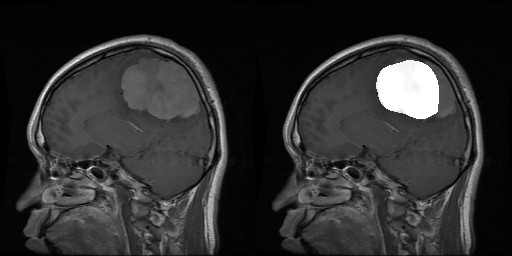

[0 0 0 ... 0 0 0]


In [8]:
import tensorflow as tf
import keras
from keras.models import load_model
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


H = 256
W = 256


model = keras.models.load_model('/UNET-tumor-segment-model.keras')

# detection_model = tf.keras.models.load_model('/tumor-detection.keras')
# model.summary()

x = '/Test-Images/627.png'
y = '/Test-Images/627-mask.png'


image = cv2.imread(x, cv2.IMREAD_COLOR)
image = cv2.resize(image, (W, H))

x = image/255.0
x = np.expand_dims(x, axis=0)

mask = cv2.imread(y, cv2.IMREAD_GRAYSCALE)
mask = cv2.resize(mask, (W, H))

y_pred = model.predict(x, verbose=0)[0]
y_pred = np.squeeze(y_pred, axis=-1)
y_pred = y_pred >= 0.5
y_pred = y_pred.astype(np.int32)

mask = np.expand_dims(mask, axis=-1)
mask = np.concatenate([mask, mask, mask], axis=-1)

y_pred = np.expand_dims(y_pred, axis=-1)
y_pred = np.concatenate([y_pred, y_pred, y_pred], axis=-1)
y_pred = y_pred * 255

line = np.ones((H, 10, 3)) * 255

pixels = np.argwhere(y_pred == 255)
print('Pixels: ', pixels)

y_pred = y_pred.astype(image.dtype)

add = cv2.addWeighted(image, 0.9, y_pred, 0.7, 0.0)

cat_images = np.concatenate([image, add], axis=1)
cv2_imshow(cat_images)

mask = mask/255.0
mask = (mask > 0.5).astype(np.int32).flatten()
y_pred = y_pred.flatten()


### Will need to create algorithm to locate any desired pixel (maybe use a gui where you can click and it will give coordinated). giving the midpoint wont really do much and may complicate things further
### Or when finished researching the specific targeting for the IGRT or steroetactic radiosurgery, just find necessarry points or include the finding points mechanism in the radiotherapy targeting code

